# Beer Scrapping and Cleaning 

In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import numpy as np

from beer_function import scrape_beer, get_beer_dict, get_brewery_name, brewery_stats

#### Get the website link to access individual beer information.

In [2]:
mult_table = ['/beer/top-rated/', '/beer/popular/', '/beer/fame/']

major_beer = []

for table in mult_table:
    major_beer+= scrape_beer(table)

len(major_beer)

750

#### Get individual beer information and compile them into a dictionary.

In [3]:
test_beer = []

for linked in major_beer:
    test_beer.append(get_beer_dict(linked))
    
len(test_beer)

750

#### Transform dictionary into a dataframe. 

In [4]:
beer_test_df = pd.DataFrame(test_beer)

beer_test_df

,Type,ABV,Rank,Average Rating,Reviews,# of Ratings,Brewery,State,Availability,Want,Got,Name
0,Stout - American ImperialRanked #1,12%,100Ranked #1,4.9 | pDev: 6.53%,150,814,Toppling Goliath Brewing Company,"Iowa, United States",Rotating/Seasonal,"3,955",119,Kentucky Brunch Brand Stout
1,Stout - Russian ImperialRanked #1,15%,100Ranked #2,4.81 | pDev: 8.11%,332,"1,719",3 Floyds Brewing Co.,"Indiana, United States",Rotating/Seasonal,"4,634",313,Marshmallow Handjee
2,Stout - American ImperialRanked #2,11%,100Ranked #3,4.79 | pDev: 7.72%,165,"1,634",Cigar City Brewing,"Florida, United States",Rotating/Seasonal,"1,785",248,Hunahpu's Imperial Stout - Double Barrel Aged
3,Stout - American ImperialRanked #3,11%,100Ranked #4,4.79 | pDev: 6.26%,154,"1,559",Perennial Artisan Ales,"Missouri, United States",Rotating/Seasonal,"2,596",230,Barrel-Aged Abraxas
4,IPA - New EnglandRanked #1,8%,100Ranked #5,4.76 | pDev: 6.93%,"2,602","14,771",The Alchemist,"Vermont, United States",Year-round,"9,682","6,516",Heady Topper
...,...,...,...,...,...,...,...,...,...,...,...,...
745,Pale Ale - EnglishRanked #1,4.3%,"91Ranked #3,665",4.1 | pDev: 10%,237,518,Timothy Taylor's Brewery,"England, United Kingdom",Year-round,127,71,Landlord
746,AltbierRanked #3,6%,"91Ranked #3,675",4.1 | pDev: 10%,346,509,Uerige Obergärige Hausbrauerei,Germany,Rotating/Seasonal,73,44,Uerige Sticke
747,Scotch Ale / Wee HeavyRanked #16,6.5%,"91Ranked #3,678",4.09 | pDev: 11.74%,575,"1,088",Belhaven Brewery Company Ltd.,"Scotland, United Kingdom",Year-round,120,113,Wee Heavy
748,Strong Ale - Belgian PaleRanked #15,10%,"91Ranked #3,683",4.09 | pDev: 11.74%,408,"1,048",AleSmith Brewing Company,"California, United States",Year-round,132,227,Horny Devil


#### Get website link to get the beer brewery information. 

In [ ]:
brewery_link = []

for linked in major_beer:
    brewery_link.append(get_brewery_name(linked))


In [6]:
brewery_avg = []

for linked in brewery_link:
    brewery_avg.append(brewery_stats(linked))
 
len(brewery_avg)

750

#### Add column to the dataframe. 

In [9]:
beer_test_df['Brewery Beer'] = brewery_avg

#### Get rid of duplicate beers.

In [12]:
clean_dataframe = beer_test_df[beer_test_df.Rank.duplicated() == False]

In [13]:
clean_dataframe.shape

(605, 13)

### Clean up individual columns. 

In [ ]:
clean_dataframe['style'] = clean_dataframe['Type'].str.split('#').str[0]

In [ ]:
clean_dataframe['AVG'] = clean_dataframe['Average Rating'].str.split('|').str[0]

In [ ]:
clean_dataframe['ranking'] = clean_dataframe['Rank'].str.split('#').str[1]

In [20]:
clean_df = clean_dataframe.drop(['Type','Rank','Average Rating'], 1)

In [21]:
clean_df.reset_index(drop=True, inplace=True)

In [22]:
clean_df

,ABV,Reviews,# of Ratings,Brewery,State,Availability,Want,Got,Name,Brewery Beer,style,AVG,ranking
0,12%,150,814,Toppling Goliath Brewing Company,"Iowa, United States",Rotating/Seasonal,"3,955",119,Kentucky Brunch Brand Stout,88,Stout - American ImperialRanked,4.9,1
1,15%,332,"1,719",3 Floyds Brewing Co.,"Indiana, United States",Rotating/Seasonal,"4,634",313,Marshmallow Handjee,153,Stout - Russian ImperialRanked,4.81,2
2,11%,165,"1,634",Cigar City Brewing,"Florida, United States",Rotating/Seasonal,"1,785",248,Hunahpu's Imperial Stout - Double Barrel Aged,246,Stout - American ImperialRanked,4.79,3
3,11%,154,"1,559",Perennial Artisan Ales,"Missouri, United States",Rotating/Seasonal,"2,596",230,Barrel-Aged Abraxas,151,Stout - American ImperialRanked,4.79,4
4,8%,"2,602","14,771",The Alchemist,"Vermont, United States",Year-round,"9,682","6,516",Heady Topper,45,IPA - New EnglandRanked,4.76,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.3%,237,518,Timothy Taylor's Brewery,"England, United Kingdom",Year-round,127,71,Landlord,12,Pale Ale - EnglishRanked,4.1,"3,665"
601,6%,346,509,Uerige Obergärige Hausbrauerei,Germany,Rotating/Seasonal,73,44,Uerige Sticke,8,AltbierRanked,4.1,"3,675"
602,6.5%,575,"1,088",Belhaven Brewery Company Ltd.,"Scotland, United Kingdom",Year-round,120,113,Wee Heavy,40,Scotch Ale / Wee HeavyRanked,4.09,"3,678"
603,10%,408,"1,048",AleSmith Brewing Company,"California, United States",Year-round,132,227,Horny Devil,146,Strong Ale - Belgian PaleRanked,4.09,"3,683"


In [24]:
new_df = (clean_df.reindex(columns=['Brewery', 'State','Availability','Name','style','ABV', 'Reviews', '# of Ratings'
                                      ,'Got', 'Want','Brewery Beer','AVG', 'ranking']))
     


In [26]:
new_df.columns

Index(['Brewery', 'State', 'Availability', 'Name', 'style', 'ABV', 'Reviews',
       '# of Ratings', 'Got', 'Want', 'Brewery Beer', 'AVG', 'ranking'],
      dtype='object')

In [29]:
col = ['Reviews', '# of Ratings', 'Brewery Beer', 'AVG','ranking']

In [30]:
clean_df[col] = clean_df[col].apply(lambda x: pd.to_numeric(x.astype(str)
                                                   .str.replace(',',''), errors='coerce'))

In [31]:
clean_df['Want'] = clean_df['Want'].str.replace(',', '').astype(float)


In [32]:
clean_df

,ABV,Reviews,# of Ratings,Brewery,State,Availability,Want,Got,Name,Brewery Beer,style,AVG,ranking
0,12%,150,814,Toppling Goliath Brewing Company,"Iowa, United States",Rotating/Seasonal,3955.0,119,Kentucky Brunch Brand Stout,88,Stout - American ImperialRanked,4.90,1
1,15%,332,1719,3 Floyds Brewing Co.,"Indiana, United States",Rotating/Seasonal,4634.0,313,Marshmallow Handjee,153,Stout - Russian ImperialRanked,4.81,2
2,11%,165,1634,Cigar City Brewing,"Florida, United States",Rotating/Seasonal,1785.0,248,Hunahpu's Imperial Stout - Double Barrel Aged,246,Stout - American ImperialRanked,4.79,3
3,11%,154,1559,Perennial Artisan Ales,"Missouri, United States",Rotating/Seasonal,2596.0,230,Barrel-Aged Abraxas,151,Stout - American ImperialRanked,4.79,4
4,8%,2602,14771,The Alchemist,"Vermont, United States",Year-round,9682.0,"6,516",Heady Topper,45,IPA - New EnglandRanked,4.76,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.3%,237,518,Timothy Taylor's Brewery,"England, United Kingdom",Year-round,127.0,71,Landlord,12,Pale Ale - EnglishRanked,4.10,3665
601,6%,346,509,Uerige Obergärige Hausbrauerei,Germany,Rotating/Seasonal,73.0,44,Uerige Sticke,8,AltbierRanked,4.10,3675
602,6.5%,575,1088,Belhaven Brewery Company Ltd.,"Scotland, United Kingdom",Year-round,120.0,113,Wee Heavy,40,Scotch Ale / Wee HeavyRanked,4.09,3678
603,10%,408,1048,AleSmith Brewing Company,"California, United States",Year-round,132.0,227,Horny Devil,146,Strong Ale - Belgian PaleRanked,4.09,3683


In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ABV           605 non-null    object 
 1   Reviews       605 non-null    int64  
 2   # of Ratings  605 non-null    int64  
 3   Brewery       605 non-null    object 
 4   State         605 non-null    object 
 5   Availability  605 non-null    object 
 6   Want          605 non-null    float64
 7   Got           605 non-null    object 
 8   Name          605 non-null    object 
 9   Brewery Beer  605 non-null    int64  
 10  style         605 non-null    object 
 11  AVG           605 non-null    float64
 12  ranking       605 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 61.6+ KB


###### Create dummy variables for year-round and seasonal availability.

In [34]:
clean_data = pd.get_dummies(clean_df.Availability, drop_first=True)

In [35]:
clean_df = clean_df.merge(clean_data,left_index=True, right_index=True)

In [36]:
clean_df['Alc Percentage'] = clean_df['ABV'].str.replace('%', '')

In [37]:
clean_df

,ABV,Reviews,# of Ratings,Brewery,State,Availability,Want,Got,Name,Brewery Beer,style,AVG,ranking,Year-round,Alc Percentage
0,12%,150,814,Toppling Goliath Brewing Company,"Iowa, United States",Rotating/Seasonal,3955.0,119,Kentucky Brunch Brand Stout,88,Stout - American ImperialRanked,4.90,1,0,12
1,15%,332,1719,3 Floyds Brewing Co.,"Indiana, United States",Rotating/Seasonal,4634.0,313,Marshmallow Handjee,153,Stout - Russian ImperialRanked,4.81,2,0,15
2,11%,165,1634,Cigar City Brewing,"Florida, United States",Rotating/Seasonal,1785.0,248,Hunahpu's Imperial Stout - Double Barrel Aged,246,Stout - American ImperialRanked,4.79,3,0,11
3,11%,154,1559,Perennial Artisan Ales,"Missouri, United States",Rotating/Seasonal,2596.0,230,Barrel-Aged Abraxas,151,Stout - American ImperialRanked,4.79,4,0,11
4,8%,2602,14771,The Alchemist,"Vermont, United States",Year-round,9682.0,"6,516",Heady Topper,45,IPA - New EnglandRanked,4.76,5,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.3%,237,518,Timothy Taylor's Brewery,"England, United Kingdom",Year-round,127.0,71,Landlord,12,Pale Ale - EnglishRanked,4.10,3665,1,4.3
601,6%,346,509,Uerige Obergärige Hausbrauerei,Germany,Rotating/Seasonal,73.0,44,Uerige Sticke,8,AltbierRanked,4.10,3675,0,6
602,6.5%,575,1088,Belhaven Brewery Company Ltd.,"Scotland, United Kingdom",Year-round,120.0,113,Wee Heavy,40,Scotch Ale / Wee HeavyRanked,4.09,3678,1,6.5
603,10%,408,1048,AleSmith Brewing Company,"California, United States",Year-round,132.0,227,Horny Devil,146,Strong Ale - Belgian PaleRanked,4.09,3683,1,10


In [38]:
clean_df['Alc Percentage'] = clean_df['Alc Percentage'].apply(pd.to_numeric, args=('coerce',))

In [39]:
clean_df['Year-round'] = clean_df['Year-round'].astype(float)

In [42]:
beer_df = clean_df.drop(['ranking', 'ABV'], 1)

In [43]:
beer_df['Average Score'] = beer_df.AVG
beer_df['Num of Rating'] = beer_df["# of Ratings"]

In [44]:
beer_clean = beer_df.drop(['AVG', '# of Ratings'], 1)

In [45]:
beer_clean['Got'] = beer_clean['Got'].str.replace(',', '').astype(float)


In [48]:
beer_clean['Av Score'] = beer_clean['Average Score']

In [49]:
beer_clean = beer_clean.drop('Average Score', 1)

In [57]:
beer_clean['Style'] = beer_clean['style'].astype(object)
beer_clean['Style'] = beer_clean['Style'].str[:-7]

#### Rearrange Dataframe

In [60]:
beer_clean = (beer_clean.reindex(columns=['Name', 'Style','Brewery', 'State', 'Availability', 
                                            'Av Score','Reviews','Want', 'Got', 'Alc Percentage', 'Year-round', 
                                          'Num of Rating','Brewery Beer']))
     

In [76]:
beer_clean = beer_clean.dropna().reset_index(drop=True)

### Keep features that will be used

In [ ]:
beer_clean = beer_clean.drop(['Num of Rating','Got'], 1)

In [107]:
beer_clean

,Name,Style,Brewery,State,Availability,Av Score,Reviews,Want,Alc Percentage,Year-round,Brewery Beer
0,Kentucky Brunch Brand Stout,Stout - American Imperial,Toppling Goliath Brewing Company,"Iowa, United States",Rotating/Seasonal,4.90,150,3955.0,12.0,0.0,88
1,Marshmallow Handjee,Stout - Russian Imperial,3 Floyds Brewing Co.,"Indiana, United States",Rotating/Seasonal,4.81,332,4634.0,15.0,0.0,153
2,Hunahpu's Imperial Stout - Double Barrel Aged,Stout - American Imperial,Cigar City Brewing,"Florida, United States",Rotating/Seasonal,4.79,165,1785.0,11.0,0.0,246
3,Barrel-Aged Abraxas,Stout - American Imperial,Perennial Artisan Ales,"Missouri, United States",Rotating/Seasonal,4.79,154,2596.0,11.0,0.0,151
4,Heady Topper,IPA - New England,The Alchemist,"Vermont, United States",Year-round,4.76,2602,9682.0,8.0,1.0,45
...,...,...,...,...,...,...,...,...,...,...,...
599,Landlord,Pale Ale - English,Timothy Taylor's Brewery,"England, United Kingdom",Year-round,4.10,237,127.0,4.3,1.0,12
600,Uerige Sticke,Altbier,Uerige Obergärige Hausbrauerei,Germany,Rotating/Seasonal,4.10,346,73.0,6.0,0.0,8
601,Wee Heavy,Scotch Ale / Wee Heavy,Belhaven Brewery Company Ltd.,"Scotland, United Kingdom",Year-round,4.09,575,120.0,6.5,1.0,40
602,Horny Devil,Strong Ale - Belgian Pale,AleSmith Brewing Company,"California, United States",Year-round,4.09,408,132.0,10.0,1.0,146


### Pickle Dataframe

In [112]:
import sys
sys.setrecursionlimit(10000)
beer_clean.to_pickle('beer_df.pkl')

### Heatmap, Correlation Matrix, and Statsmodel Summary

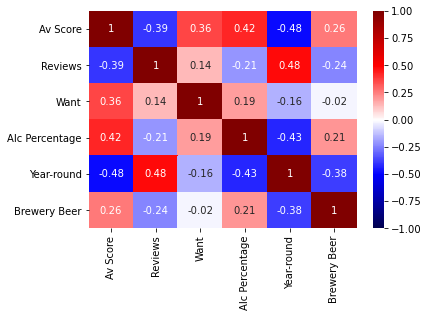

In [108]:
sns.heatmap(beer_clean.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [109]:
beer_clean.corr()

,Av Score,Reviews,Want,Alc Percentage,Year-round,Brewery Beer
Av Score,1.000000,-0.391603,0.362659,0.422109,-0.476878,0.259928
Reviews,-0.391603,1.000000,0.140491,-0.205519,0.478808,-0.237195
Want,0.362659,0.140491,1.000000,0.192052,-0.155499,-0.020072
Alc Percentage,0.422109,-0.205519,0.192052,1.000000,-0.425118,0.207101
Year-round,-0.476878,0.478808,-0.155499,-0.425118,1.000000,-0.379004
Brewery Beer,0.259928,-0.237195,-0.020072,0.207101,-0.379004,1.000000


In [110]:
X = beer_clean.loc[:, ['Reviews', 'Want', 'Alc Percentage', 'Year-round',  'Brewery Beer']]
y = beer_clean['Av Score']

In [111]:
# Define the model
lm1 = smf.ols('y ~ X', data=beer_clean)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     89.65
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           2.55e-70
Time:                        18:07:59   Log-Likelihood:                -87.385
No. Observations:                 604   AIC:                             186.8
Df Residuals:                     598   BIC:                             213.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1067      0.047     86.525      0.000       4.014       4.200
X[0]          -0.0001   1.63e-05     -8.238      0.000      -0.000      -0.000
X[1]           0.0001   1.32e-05     10.448      0.000       0.000       0.000
X[2]           0.0255      0.004      6.046      0.000       0.017       0.034
X[3]          -0.1164      0.030     -3.854      0.000      -0.176      -0.057
X[4]           0.0003      0.000      2.773      0.006    9.64e-05       0.001
==============================================================================
Omnibus:                      445.882   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7904.072
Skew:                          -3.112   Prob(JB):                         0.00
Kurtosis:                      19.593   Cond. No.                     6.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""